**Seeding for reproducibility**

In [1]:
# Set seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

**Importing the dependencies**

In [2]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

**Data Curation**

Upload the kaggle.json file

In [10]:
!pip install kaggle

Defaulting to user installation because normal site-packages is not writeable


In [11]:
kaggle_credentails = json.load(open("kaggle.json"))

FileNotFoundError: [Errno 2] No such file or directory: 'kaggle.json'

In [5]:
# setup Kaggle API key as environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_credentails["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentails["key"]

In [6]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

100% 2.04G/2.04G [00:20<00:00, 202MB/s]
100% 2.04G/2.04G [00:20<00:00, 105MB/s]


In [7]:
!ls

kaggle.json  plantvillage-dataset.zip  sample_data


In [9]:
# Unzip the downloaded dataset
with ZipFile("archive(2).zip", 'r') as zip_ref:
    zip_ref.extractall()

FileNotFoundError: [Errno 2] No such file or directory: 'archive(2).zip'

In [10]:
print(os.listdir("plantvillage dataset"))


print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:5])

print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:5])

print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:5])

['grayscale', 'segmented', 'color']
38
['Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Bacterial_spot', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___healthy']
38
['Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Bacterial_spot', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___healthy']
38
['Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Bacterial_spot', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___healthy']


**Number of Classes = 38**

In [11]:
print(len(os.listdir("plantvillage dataset/color/Grape___healthy")))
print(os.listdir("plantvillage dataset/color/Grape___healthy")[:5])

423
['05cff9d7-0f63-4b6e-9aa3-199cf9ffa64c___Mt.N.V_HL 9111.JPG', '0ce12a10-c6ff-494e-a927-5ddc809c707a___Mt.N.V_HL 8945.JPG', 'c839e134-6692-4065-8e12-7ea01adcc794___Mt.N.V_HL 9014.JPG', '452823c1-22d2-4bce-a4cc-8ad014421261___Mt.N.V_HL 6199.JPG', 'c48a4277-3bd4-45c8-be06-8bdc4404f252___Mt.N.V_HL 6137.JPG']


**Data Preprocessing**

In [3]:
# Dataset Path
base_dir = 'C:/Users/s/Desktop/Plant-Disease-Prediction-main/PlantVillage'

(256, 256, 3)


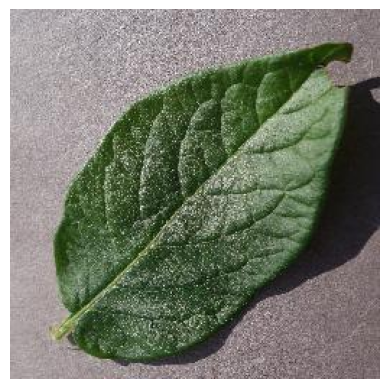

In [4]:
image_path = 'C:/Users/s/Desktop/Plant-Disease-Prediction-main/PlantVillage/Potato___healthy/ee052892-e935-4fbb-9344-4d23c57c6890___RS_HL 5400.JPG'

# Read the image
img = mpimg.imread(image_path)

print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

In [5]:
image_path = 'C:/Users/s/Desktop/Plant-Disease-Prediction-main/PlantVillage/Potato___healthy/ee052892-e935-4fbb-9344-4d23c57c6890___RS_HL 5400.JPG'

# Read the image
img = mpimg.imread(image_path)

print(img)

[[[173 168 172]
  [160 155 159]
  [172 167 171]
  ...
  [132 120 122]
  [141 129 131]
  [126 114 116]]

 [[195 190 194]
  [184 179 183]
  [189 184 188]
  ...
  [132 120 122]
  [139 127 129]
  [119 107 109]]

 [[192 187 191]
  [181 176 180]
  [183 178 182]
  ...
  [134 122 124]
  [146 134 136]
  [134 122 124]]

 ...

 [[174 164 165]
  [173 163 164]
  [168 158 159]
  ...
  [133 118 121]
  [142 127 130]
  [129 114 117]]

 [[173 163 164]
  [173 163 164]
  [170 160 161]
  ...
  [123 108 111]
  [125 110 113]
  [116 101 104]]

 [[167 157 158]
  [171 161 162]
  [173 163 164]
  ...
  [137 122 125]
  [135 120 123]
  [130 115 118]]]


In [6]:
# Image Parameters
img_size = 224
batch_size = 32

**Train Test Split**

In [7]:
# Image Data Generators
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Use 20% of data for validation
)

In [8]:
# Train Generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 16516 images belonging to 15 classes.


In [9]:
# Validation Generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 4122 images belonging to 15 classes.


**Convolutional Neural Network**

In [10]:
# Model Definition
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))


model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

C:\Users\s\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    47,776,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │         3,855 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,799,247 (182.34 MB)

 Trainable params: 47,799,247 (182.34 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**Model training**

In [13]:
# Training the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,  # Number of steps per epoch
    epochs=5,  # Number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size  # Validation steps
)

C:\Users\s\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
516/516 ━━━━━━━━━━━━━━━━━━━━ 1130s 2s/step - accuracy: 0.5236 - loss: 2.1864 - val_accuracy: 0.8306 - val_loss: 0.5106
Epoch 2/5
  1/516 ━━━━━━━━━━━━━━━━━━━━ 15:40 2s/step - accuracy: 0.7812 - loss: 0.6744

C:\Users\s\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


516/516 ━━━━━━━━━━━━━━━━━━━━ 39s 73ms/step - accuracy: 0.7812 - loss: 0.6744 - val_accuracy: 0.8237 - val_loss: 0.5355
Epoch 3/5
516/516 ━━━━━━━━━━━━━━━━━━━━ 908s 2s/step - accuracy: 0.8776 - loss: 0.3655 - val_accuracy: 0.8364 - val_loss: 0.5077
Epoch 4/5
516/516 ━━━━━━━━━━━━━━━━━━━━ 39s 72ms/step - accuracy: 0.9688 - loss: 0.1231 - val_accuracy: 0.8254 - val_loss: 0.5338
Epoch 5/5
516/516 ━━━━━━━━━━━━━━━━━━━━ 905s 2s/step - accuracy: 0.9505 - loss: 0.1499 - val_accuracy: 0.8459 - val_loss: 0.5036


**Model Evaluation**

In [14]:
# Model Evaluation
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Evaluating model...
128/128 ━━━━━━━━━━━━━━━━━━━━ 39s 306ms/step - accuracy: 0.8465 - loss: 0.5107
Validation Accuracy: 84.59%


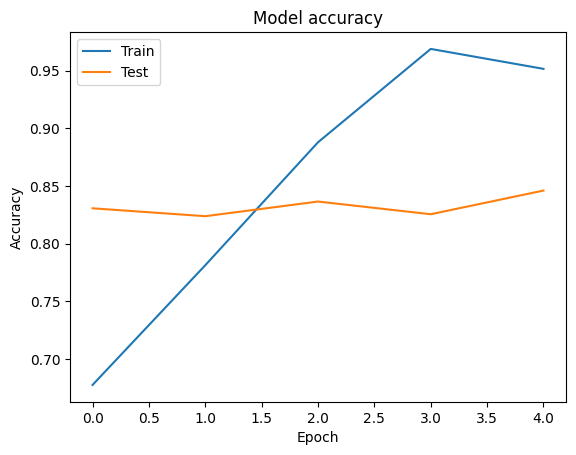

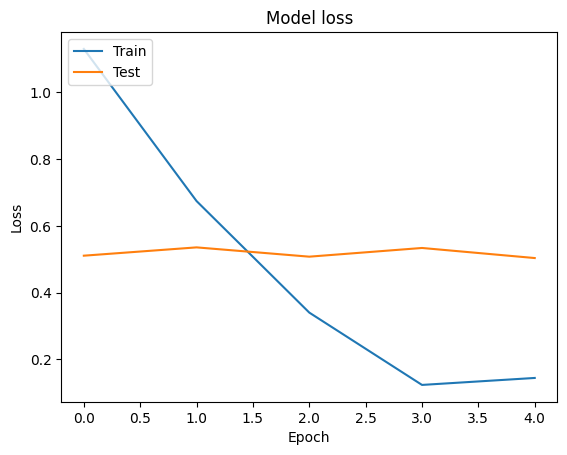

In [15]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

**Building a Predictive System**

In [16]:
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [17]:
# Create a mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [18]:
class_indices

{0: 'Pepper__bell___Bacterial_spot',
 1: 'Pepper__bell___healthy',
 2: 'Potato___Early_blight',
 3: 'Potato___Late_blight',
 4: 'Potato___healthy',
 5: 'Tomato_Bacterial_spot',
 6: 'Tomato_Early_blight',
 7: 'Tomato_Late_blight',
 8: 'Tomato_Leaf_Mold',
 9: 'Tomato_Septoria_leaf_spot',
 10: 'Tomato_Spider_mites_Two_spotted_spider_mite',
 11: 'Tomato__Target_Spot',
 12: 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 13: 'Tomato__Tomato_mosaic_virus',
 14: 'Tomato_healthy'}

In [19]:
# saving the class names as json file
json.dump(class_indices, open('class_indices.json', 'w'))

In [20]:
# Example Usage
image_path = 'C:/Users/s/Desktop/Plant-Disease-Prediction-main/PlantVillage/Pepper__bell___Bacterial_spot/4c664b0a-9ee7-48c2-aaf4-d54e34f5edd3___JR_B.Spot 9060.JPG'
#image_path = '/content/test_blueberry_healthy.jpg'
#image_path = '/content/test_potato_early_blight.jpg'
predicted_class_name = predict_image_class(model, image_path, class_indices)

# Output the result
print("Predicted Class Name:", predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step
Predicted Class Name: Pepper__bell___Bacterial_spot


**Save the model to Google drive or local**

In [21]:
#model.save('C:/Users/s/Desktop/plant-disease-prediction-cnn-deep-leanring-project-main/model_training_notebook/model.keras')

In [22]:
model.save('plant_disease_prediction_model.h5')

In [23]:
model.save('model.h5')